# MNIST classification
### Example adopted from Chapter 3 of _the fundamentals of Machine Learning and Deep Learning in Python using Scikit-Learn, Keras and TensorFlow 2_ [Text (early release)](https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf) [GitHub](https://github.com/ageron/handson-ml2)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MNIST-classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

MNIST is a dataset of 70,000 small images of digits handwritten digits. Each image has 28×28 pixels, thus totol of 784 features. Each feature is a grey level value from 0 - 255

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)  # load dataset from https://openml.org/ 
mnist.keys()

dict_keys(['details', 'target', 'url', 'DESCR', 'data', 'feature_names', 'categories'])

In [4]:
X, y = mnist["data"], mnist["target"]

Convert the char type into int

In [5]:
y = y.astype(np.uint8)

The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Simplies to a Binary classifier
Implement a _5 detector_
Prepare a data set for binary classification: 5 or not 5

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

scale the input date

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #center the distribution around zero (mean), with a standard deviation of 1.
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Stochastic Gradient Decsent Model with Log loss

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3, random_state=42, loss='log')

sgd_clf.fit(X_train_std, y_train_5) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Evaluate the model performance. 

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_test_5_pred = sgd_clf.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_5_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_5_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_5_pred)))

Accuracy score:  0.9724
Precision score:  0.8802469135802469
Recall score:  0.7993273542600897


In [11]:
y_test_5_scores = sgd_clf.predict_proba(X_test_std)[:,1]

In [12]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_5, y_test_5_scores)
roc_auc = auc(fpr, tpr)

Draw the ROC curve

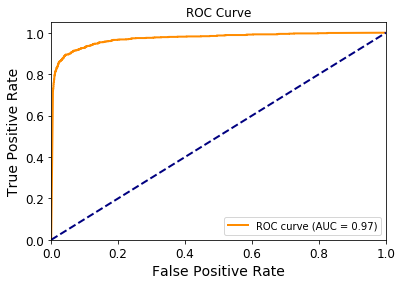

In [13]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Exercise 1. The results are not great. A closer look reveals that We have trained the SGDC model on the orginal un-scaled data. Now try again with scaled data and see the model performance with ROC curve and AUC. 

### Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', kernel='rbf', random_state=42, probability=True)
svm_clf.fit(X_train_std, y_train_5)

In [ ]:
y_test_5_pred = svm_clf.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_5_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_5_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_5_pred)))

### Exercise 2: Evaluate the model performace with ROC curve and AUC. 

In [16]:
y_test_5_scores = svm_clf.predict_proba(X_test_std)[:,1]

In [17]:
fpr, tpr, thresholds = roc_curve(y_test_5, y_test_5_scores)
roc_auc = auc(fpr, tpr)

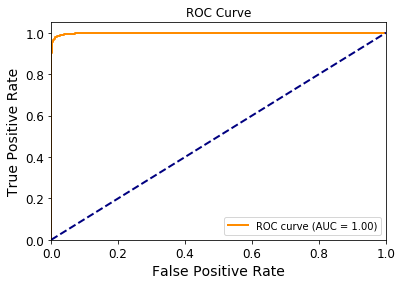

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Exercise 3: Fit a SVM model to the whole data set. Use y_train, not y_train_5. Evaluate the model with the scalar scores: precision, accurancy and recall. 

In [19]:
svm_clf_all = SVC(gamma='scale', kernel='rbf', random_state=42, probability=True, decision_function_shape='ovo')
svm_clf_all.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
y_test_pred = svm_clf_all.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test, y_test_pred)))
print("Precision score: ", (precision_score(y_test, y_test_pred, average=None)))
print("Recall score: ", (recall_score(y_test, y_test_pred, average=None)))

Accuracy score:  0.966
Precision score:  [0.97876643 0.98686515 0.95769231 0.96834817 0.96919918 0.96388262
 0.97997893 0.92523364 0.96058091 0.97025641]
Recall score:  [0.9877551  0.99295154 0.96511628 0.96930693 0.96130346 0.9573991
 0.97077244 0.96303502 0.95071869 0.93756194]
